# Learning Attention-based Embeddings for Relation Prediction in Knowledge Graphs

### Abstract

The recent proliferation of knowledge graphs
(KGs) coupled with incomplete or partial information, in the form of missing relations
(links) between entities, has fueled a lot of
research on knowledge base completion (also
known as relation prediction). Several recent works suggest that convolutional neural
network (CNN) based models generate richer
and more expressive feature embeddings and
hence also perform well on relation prediction.
However, we observe that these KG embeddings treat triples independently and thus fail
to cover the complex and hidden information
that is inherently implicit in the local neighborhood surrounding a triple. To this effect, our
paper proposes a novel attention-based feature
embedding that captures both entity and relation features in any given entity’s neighborhood. Additionally, we also encapsulate relation clusters and multi-hop relations in our
model. Our empirical study offers insights
into the efficacy of our attention-based model
and we show marked performance gains in
comparison to state-of-the-art methods on all
datasets

$=>$ Bài báo nói rằng KG nhúng bộ ba triples độc lập với nhau và vì vậy thất bại để cover những thông tin phức tạp và ẩn được kết thừa từ những hàng xóm cục bộ xung quanh bộ ba
Bái báo đề xuất nhúng theo đặc trưng mà có thể captures đặc trưng của cả entity và relation trong bất kỳ hàng xóm nào. Bên cạnh đó, đề xuất phân loại  encapsulate relation và quan hệ multi-hop trong mô hình của chúng tôi

## 1 Introduction

Knowledge graphs (KGs) represent knowledge
bases (KBs) as a directed graph whose nodes
and edges represent entities and relations between entities, respectively. For example, in Figure 1, a triple (London, capital of, United Kingdom) is represented as two entities: London and
United Kingdom along with a relation (capital of)
linking them. KGs find uses in a wide variety of applications such as semantic search (Berant et al., 2013; Berant and Liang, 2014), dialogue generation (He et al., 2017; Keizer et al.,
2017), and question answering (Zhang et al., 2016;
Diefenbach et al., 2018), to name a few. However, KGs typically suffer from missing relations (Socher et al., 2013a; West et al., 2014).
This problem gives rise to the task of knowledge
base completion (also referred to as relation prediction), which entails predicting whether a given
triple is valid or not.



State-of-the-art relation prediction methods are
known to be primarily knowledge embedding
based models. They are broadly classified
as translational models (Bordes et al., 2013;
Yang et al., 2015; Trouillon et al., 2016) and convolutional neural network (CNN) (Nguyen et al.,
2018; Dettmers et al., 2018) based models. While
translational models learn embeddings using simple operations and limited parameters, they produce low quality embeddings. In contrast, CNN
based models learn more expressive embeddings
due to their parameter efficiency and consideration
of complex relations. However, both translational
and CNN based models process each triple independently and hence (vì thế) fail to encapsulate the semantically rich and latent relations that are inherently
present in the vicinity (lân cận) of a given entity in a KG.

Motivated by the aforementioned observations, we propose a generalized attention-based
graph embedding for relation prediction. For
node classification, graph attention networks
(GATs) (Velickovi ˇ c et al. ´ , 2018) have been shown
to focus on the most relevant portions of the graph,
namely the node features in a 1-hop neighborhood.
Given a KG and the task of relation prediction, our
model generalizes and extends the attention mechanism by guiding attention to both entity (node)
and relation (edge) features in a multi-hop neighborhood of a given entity / node.

Our idea is: 1) to capture multi-hop relations (Lin et al., 2015) surrounding a given
node, 2) to encapsulate the diversity of roles
played by an entity in various relations, and 3)
to consolidate the existing knowledge present in
semantically similar relation clusters (ValverdeRebaza and de Andrade Lopes, 2012). Our model
achieves these objectives by assigning different
weight mass (attention) to nodes in a neighborhood and by propagating attention via layers in
an iterative fashion. However, as the model
depth increases, the contribution of distant entities decreases exponentially. To resolve this issue, we use relation composition as proposed by
(Lin et al., 2015) to introduce an auxiliary edge
between n-hop neighbors, which then readily allows the flow of knowledge between entities. Our
architecture is an encoder-decoder model where
our generalized graph attention model and ConvKB (Nguyen et al., 2018) play the roles of an
encoder and decoder, respectively. Moreover,
this method can be extended for learning effective embeddings for Textual Entailment Graphs
(KOTLERMAN et al., 2015), where global learning has proven effective in the past as shown by
(Berant et al., 2015) and (Berant et al., 2010).

Our contributions are as follows. To the best
of our knowledge, we are the first to learn new
graph attention based embeddings that specifically
target relation prediction on KGs. Secondly, we
generalize and extend graph attention mechanisms
to capture both entity and relation features in a
multi-hop neighborhood of a given entity. Finally, we evaluate our model on challenging relation prediction tasks for a wide variety of realworld datasets. Our experimental results indicate
a clear and substantial improvement over stateof-the-art relation prediction methods. For instance, our attention-based embedding achieves
an improvement of 104% over the state-of-the-art
method for the Hits@1 metric on the popular Freebase (FB15K-237) dataset.

The rest of the paper is structured as follows.
We first provide a 

* Section 2 : Review of related work
* Section 3 : Our detailed approach
* Section 4 : Experimental results and dataset descriptions are followed by our conclusion
* Section 5 : Future research directions

## 2 Related Work

Recently, several variants of KG embeddings have
been proposed for relation prediction. These
methods can be broadly classified as: (i) compositional, (ii) translational, (iii) CNN based, and (iv)
graph based models. 



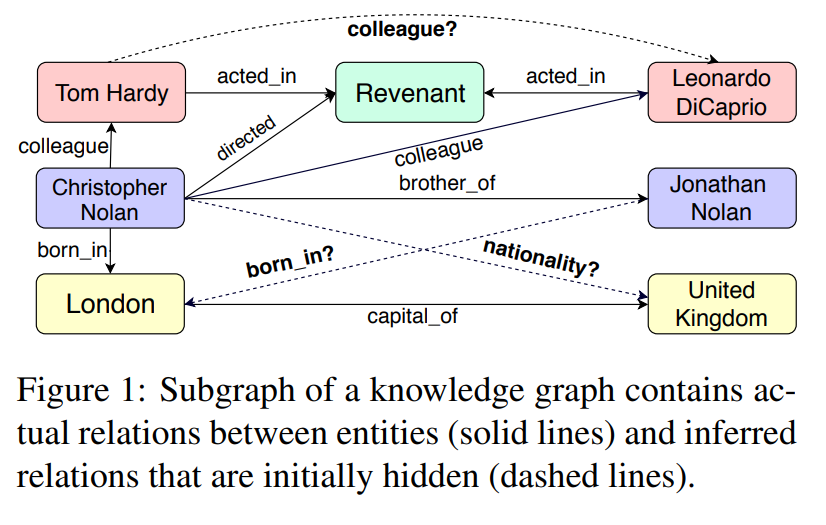

In [2]:
from IPython.display import Image
Image("../../images/kbat/kbat_f1.png")

RESCAL (Nickel et al., 2011),
NTN (Socher et al., 2013b), and the Holographic embedding model (HOLE) (Nickel et al.,
2016) are examples of compositional based models. Both RESCAL and NTN use tensor products
which capture rich interactions, but require a large
number of parameters to model relations and are
thus cumbersome to compute. To combat these
drawbacks, HOLE creates more efficient and
scalable compositional representations using the
circular correlation of entity embeddings.


In comparison, translational models
like TransE (Bordes et al., 2013), DISTMULT (Yang et al., 2015) and ComplEx (Trouillon et al., 2016) propose arguably simpler models.
TransE considers the translation operation
between head and tail entities for relations. DISTMULT (Yang et al., 2015) learns embeddings
using a bilinear diagonal model which is a special
case of the bilinear objective used in NTN and
TransE. DISTMULT uses weighted elementwise dot products to model entity relations.
ComplEx (Trouillon et al., 2016) generalizes
DISTMULT (Yang et al., 2015) by using complex
embeddings and Hermitian dot products instead.
These translational models are faster, require
fewer parameters and are relatively easier to train,
but result in less expressive KG embeddings.

Recently, two CNN based models have
been proposed for relation prediction, namely
ConvE (Dettmers et al., 2018) and ConvKB (Nguyen et al., 2018). ConvE uses 2-D
convolution over embeddings to predict links.
It comprises of a convolutional layer, a fully
connected projection layer and an inner product
layer for the final predictions. Different feature
maps are generated using multiple filters to extract global relationships. Concatenation of these
feature maps represents an input triple. These
models are parameter efficient but consider each triple independently without taking into account
the relationships between the triples.

A graph based neural network model called
R-GCN (Schlichtkrull et al., 2018) is an extension of applying graph convolutional networks
(GCNs) (Kipf and Welling, 2017) to relational
data. It applies a convolution operation to the
neighborhood of each entity and assigns them
equal weights. This graph based model does not
outperform the CNN based models.


Existing methods either learn KG embeddings
by solely focusing on entity features or by taking
into account the features of entities and relations in
a disjoint manner. Instead, our proposed graph attention model holistically captures multi-hop and
semantically similar relations in the n-hop neighborhood of any given entity in the KG.

## 3 Our Approach

We begin this section by introducing the notations
and definitions used in the rest of the paper, followed by a brief background on graph attention
networks (GATs) (Velickovi ˇ c et al. ´ , 2018). Finally, we describe our proposed attention architecture for knowledge graphs followed by our decoder network.

#### 3.1 Background

A knowledge graph is denoted by $G = (E, R)$,
where $E$ and $R$ represent the set of entities
(nodes) and relations (edges), respectively. $A$
triple $(e_s, r, e_o)$ is represented as an edge $r$ between nodes $e_s$ and $e_r$ in $G$
. Embedding models
try to learn an effective representation of entities,
relations, and a scoring function $f$, such that for
a given input triple $t = (e_s, r, e_o)$, $f(t)$ gives the
likelihood of $t$ being a valid triple. For example,
Figure 1 shows the subgraph from a KG which
infers missing links represented by dashed lines
using existing triples such as (London, captial of,
United Kingdom).

#### 3.2 Graph Attention Networks (GATs)

Graph convolutional networks (GCNs)
(Kipf and Welling, 2017) gather information
from the entity’s neighborhood and all neighbors
contribute equally in the information passing. To address the shortcomings of GCNs,
(Velickovi ˇ c et al. ´ , 2018) introduced graph attention networks (GATs). GATs learn to assign
varying levels of importance to nodes in every
node’s neighborhood, rather than treating all
neighboring nodes with equal importance, as is
done in GCN

The input feature set of nodes to a layer is $x = {\vec{x}_1, \vec{x}_2, ..., \vec{x}_N }$. A layer produces a transformed
set of node feature vectors $x' = {\vec{x}'_1, \vec{x}'_2, ..., \vec{x}'_N }$,
where $\vec{x}_i$ and $\vec{x}_i$ are input and output embeddings of the entity $e_i$, and $N$ is number of entities
(nodes). A single GAT layer can be described as

$$
e_{ij} = a(W \vec{x}_i, \vec{x}_j)\hspace{3cm}(1)
$$

where $e_{ij}$ is the attention value of the edge $(e_i, e_j )$ in $G$, $W$ is a parametrized linear transformation
matrix mapping the input features to a higher dimensional output feature space, and a is any attention function of our choosing.

Attention values for each edge are the *importance* of the edge $(ei, ej)'$s features for a source
node $e_i$. Here, the relative attention $α_{ij}$ is computed using a softmax function over all the values in the neighborhood. Equation 2 shows the output of a layer. GAT employs *multi-head attention* to stabilize the learning process as credited to
(Vaswani et al., 2017).

$$
\begin{align}
{\vec{x'}_i}&={\sigma\left(\sum_{j\in \mathcal{N}(i)} {\alpha_{ij} W \vec{x}_j }\right)},&(2)
\end{align}
$$


The multihead attention process of concatenating
K attention heads is shown as follows in Equation


$$
\begin{align}
{\vec{x'}_i}&={\Big|\Big|_{k=1}^{K}\sigma\left(\sum_{j\in \mathcal{N}(i)}\alpha_{ij}^{k}W^{k}x_{j}\right)},&(3)
\end{align}
$$

where $k$ represents concatenation, σ represents any non-linear function, $\alpha_{ij}^k$ are normalized attention coefficients of edge $(e_i, e_j)$ calculated by the $k$-th attention mechanism, and $W_k$ represents the corresponding linear transformation matrix of the $k$-th attention mechanism. The output embedding in the final layer is calculated using *averaging*, instead of the concatenation operation, to achieve multi-head attention, as is shown in the following Equation 4 

$$
\begin{align}
{\vec{x'}_i} &= {\sigma\left( \frac{1}{K} \sum_{k=1}^{K} \sum_{j \in N_i} \alpha_{ij}^k W^k \vec{x}_j \right)},&(4)
\end{align}
$$

#### 3.3 Relations are Important


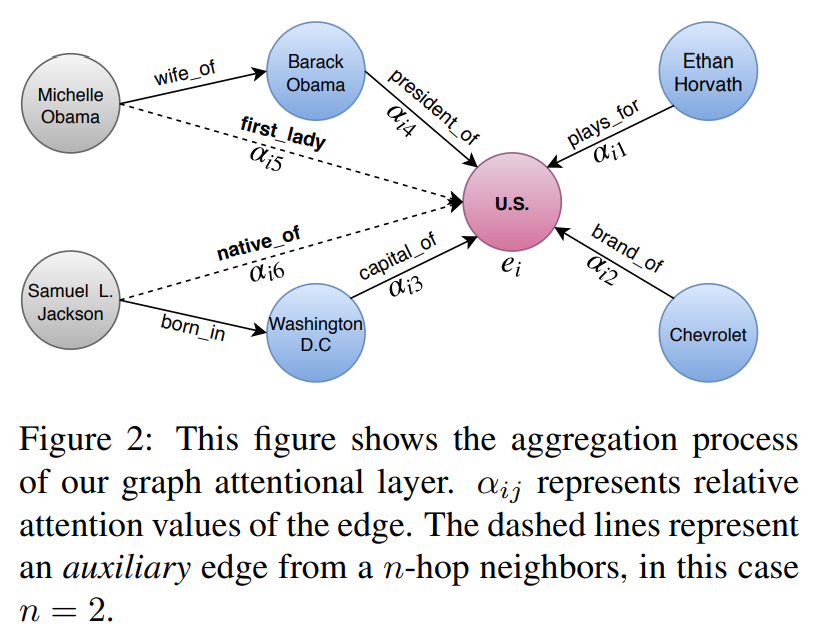

In [4]:
Image("../../images/kbat/kbat_f2.png")

Despite the success of GATs, they are unsuitable for KGs as they ignore relation (edge) features, 
which are an integral part of KGs. In KGs, entities play different roles depending on the *relation*
they are associated with. For example, in Figure 1, entity Christopher Nolan appears in two different triples assuming the roles of a brother and a
director. To this end, we propose a novel embedding approach to incorporate(kết hợp) relation and neighboring node features in the attention mechanism.
We define a single attentional layer, which is the
building block of our model. Similar to GAT, our
framework is agnostic to the particular choice of
attention mechanism.

Each layer in our model takes two embedding matrices as input. Entity embeddings are represented by a matrix $H ∈ \mathbb{R}^{N_e×T}$, where the $i$-th row is the embedding of entity $e_i$ , $N_e$ is the total number of entities, and $T$ is the feature dimension
of each entity embedding. With a similar construction, the relation embeddings are represented by a matrix $G ∈ \mathbb{R}^{N_r×P}$ . The layer then outputs the corresponding embedding matrices, $H' ∈ \mathbb{R}^{N_e×T'}$
and $G' ∈ \mathbb{R}^{N_r×P'}$.


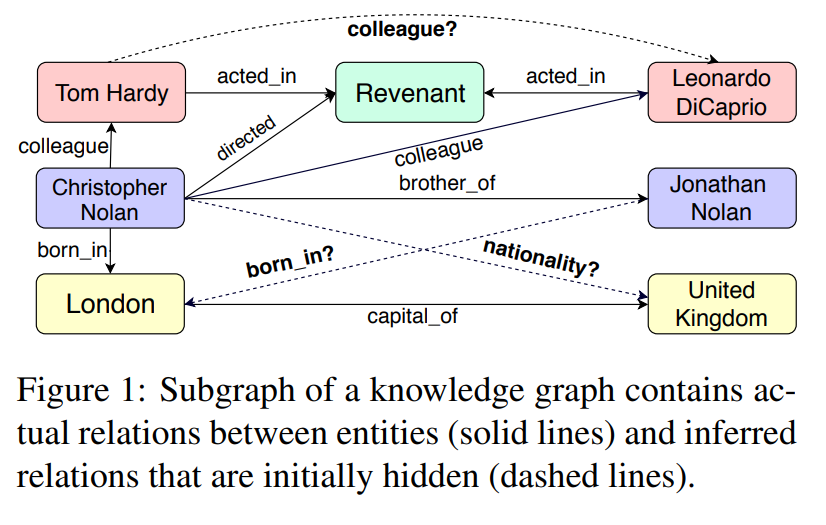

In [3]:
Image("../../images/kbat/kbat_f1.png")

Dù cho những thành công của GATs, chúng vẫn không phù hợp for KGs như là chúng lờ đi đặc trưng mối quan hệ(cạnh), cái mà là một phần không thể thiếu trong KGs. Trong KGs, thực thể đóng nhiều vai trò phù thuộc vào mối quan hệ mà chúng phụ thuộc vào. Ví dụ trong hình 1, thực thể *Christopher Nolan* xuất hiện trong hai bộ ba khác nhau, ngầm hiểu với vai trò của anh trai và là một nhà đạo diễn (brother_of, directed). Cuối cùng, chúng tôi đề xuất một phương pháp nhúng mới để kết hợp *mối quan hệ* và *những node đặc trưng hàng xóm* trong cơ chế attention. Chúng tôi định nghĩa một single attentional layer mà là một khối của mô hình chúng tôi. Tương tự như GAT, framwork của chúng tôi là một bất khả tri (agnostic - học không lý giải) để cho trường hợp cụ thể của attention mechanism.

Mỗi layer trong mô hình của chúng tôi lấy hai vector nhúng là input. Entity embeddings biểu diễn bởi ma trận $H ∈ R^{N_e×T}$, với dòng thứ i là embedding of entity $e_i$, $N_e$ là tổng số lượng entities, và $T$ là miền đặc trưng(feature dimension)
của mỗi entity embedding. Với một cách xây dựng tương tự, relation embeddings được biễn diên bằng một ma trận $G ∈ \mathbb{R}^{N_r×P}$ . Layer sau đó xuất ra ma trận tương ứng , $H' ∈ \mathbb{R}^{N_e×T'}$ và $G' ∈ \mathbb{R}^{N_r×P'}$.



In order to obtain the new embedding for an entity $e_i$ , a representation of each triple associated with $e_i$ is learned. We learn these embeddings by performing a linear transformation over the concatenation of entity and relation feature
vectors corresponding to a particular triple $t^k_{ij} = (ei, rk, ej)$, as is shown in Equation 5. This operation is also illustrated in the initial block of Figure 4
$$
\begin{align}
{\overrightarrow{c_{ijk}}}&={W_1 [\vec{h}_i \| \vec{h}_j|| \vec{g}_k]},&(5)
\end{align}
$$
where $\overrightarrow{c_{ijk}}$ is the vector representation of a triple $t^k_{ij}$ . Vectors $\vec{h}_i$,
$\vec{h}_j$ , and $\vec{g}_k$ denote embeddings of entities $e_i$, $e_j$ and relation $r_k$, respectively. 
Additionally, $W_1$ denotes the linear transformation matrix. Similar to (Velickovi ˇ c et al. ´ , 2018), we learn the importance of each triple $t^k_{ij}$ denoted by $b_{ij}^{k}$. We perform a linear transformation parameterized by a weight matrix $W_2$ followed by application of the $LeakyRelu$ non-linearity to get the absolute attention value of the triple (Equation 6).

$$
\begin{align}
{b_{ijk}}&={LeakyRelu(W_2 c_{ijk}})&(6)
\end{align}
$$

To get the relative attention values *softmax* is applied over $b_{ijk}$ as shown in Equation 7. Figure 3 shows the computation of relative attention values $α_{ijk}$ for a single triple. 

$$
\begin{align*}
{\alpha_{ijk}}&={\text{softmax}_{jk}(b_{ijk})} & (7)\\
&=\frac{\text{exp}(b_{ijk})}{\sum_{n\in \mathcal{N}_i} \sum_{r\in \mathcal{R}_{in}}\text{exp}(b_{inr})}
\end{align*}
$$

where $N_i$ denotes the neighborhood of entity $e_i$ and $R_{ij}$ denotes the set of relations connecting entities $e_i$ and $e_j$ . The new embedding of the entity $e_i$ is the sum of each triple representation weighted by their attention values as shown in Equation 8.

$$
\begin{align*}
{\overrightarrow{h'_{i}}}&={\sigma\left(\sum_{j \in \mathcal{N}_i} \sum_{k \in \mathcal{R}_{ij}} \alpha_{ijk} \overrightarrow{c_{ijk}}\right)} & (8)
\end{align*}
$$

As suggested by (Velickovi ˇ c et al. ´ , 2018), multihead attention which was first introduced by (Vaswani et al., 2017), is used to stabilize the learning process and encapsulate more information about the neighborhood. Essentially, $M$ independent attention mechanisms calculate the embeddings, which are then concatenated, resulting in the following representation:


$$
\begin{align}
{\overrightarrow{h'}_i}&={\Big|\Big|_{m=1}^{M}\sigma\left(\sum_{j\in \mathcal{N}(i)}\alpha_{ijk}^{m}c^{m}_{ijk}\right)},&(9)
\end{align}
$$

Để mà chứa một embedding mới cho một entity $e_i$ , một biễu diễn của mỗi bộ ba liên hệ với $e_i$ sẽ được học. Chúng tôi học những embeddings này bằng cách thực hiện biến đổi tuyến tính qua việc ghép những vector đặc trưng entity và relation  tương ứng với những bộ ba riêng biệt $t^k_{ij} = (ei, rk, ej)$, được show trong Equation 5. Thao tác này cũng được minh học trong block khởi tạo ở Figure 4

$$
\begin{align}
{\overrightarrow{c_{ijk}}}&={W_1 [\vec{h}_i || \vec{h}_j|| \vec{g}_k]},&(5)
\end{align}
$$

trong đó $\overrightarrow{c_{ijk}}$ là biểu diễn vector của bộ ba $t^k_{ij}$ . Vectors $\vec{h}_i$,
$\vec{h}_j$ , và $\vec{g}_k$ nghĩa là embeddings of entities $e_i$, $e_j$ và relation $r_k$, tương ứng. 
Ngoài ra, $W_1$ nghĩa là ma trận biến đổi tuyến tính. Tương tự như bài báo (Velickovi ˇ c et al. ´ , 2018), chúng tôi học sự quan trọng của mỗi bộ ba $t^k_{ij}$ ký hiệu bởi $b_{ij}^{k}$ . Chúng tôi thực hiện tham số hóa quá trình biến đổi tuyến tính bằng ma trận trọng số W_2 theo sau áp dụng bằng hàm phi tuyến tính để lấy giá trị chú ý tuyệt đối của bộ ba (Equation 6).

$$
\begin{align}
{b_{ijk}}&={LeakyRelu(W_2 c_{ijk}})&(6)
\end{align}
$$

Để lấy giá trị chú ý realtion *softmax* được áp dụng qua $b_{ijk}$ được show ở Equation 7. Figure 3 hiển thị quá trình tính toán giá trị của mối quan hệ chú ý (relative attention values) $α_{ijk}$ cho mỗi bộ ba 

$$
\begin{align*}
{\alpha_{ijk}}&={\text{softmax}_{jk}(b_{ijk})} & (7)\\
&=\frac{\text{exp}(b_{ijk})}{\sum_{n\in \mathcal{N}_i} \sum_{r\in \mathcal{R}_{in}}\text{exp}(b_{inr})}
\end{align*}
$$

Trong đó $N_i$ nghĩa là hàng xóm của entity $e_i$ và $R_{ij}$ nghĩa là một set của mối quan hệ kết nối entities $e_i$ và $e_j$ . The new embedding of the entity $e_i$ là tổng của mối bộ ba biểu diễn bởi trọng số bởi giá trị chú ý hiển thị trong Equation 8.


$$
\begin{align*}
{\overrightarrow{h'_{i}}}&={\sigma\left(\sum_{j \in \mathcal{N}_i} \sum_{k \in \mathcal{R}_{ij}} \alpha_{ijk} \overrightarrow{c_{ijk}}\right)} & (8)
\end{align*}
$$

Như đã đề xuất bởi (Velickovi ˇ c et al. ´ , 2018), multihead attention được giới thiệu đầu tiên bởi (Vaswani et al., 2017), là được sử dụng để ổn định hóa quá trình học và gói gọn thông tin về hàng xóm. Bản chất là $M$ independent attention mechanisms(cơ chế chú ý độc lập) tính toán embeddings, mà sau đó được ghép lại, kết quả được biểu diễn dưới đây :


$$
\begin{align}
{\overrightarrow{h'}_i}&={\Big|\Big|_{m=1}^{M}\sigma\left(\sum_{j\in \mathcal{N}(i)}\alpha_{ijk}^{m}c^{m}_{ijk}\right)},&(9)
\end{align}
$$

M là với nhiều mutile head khác nhau


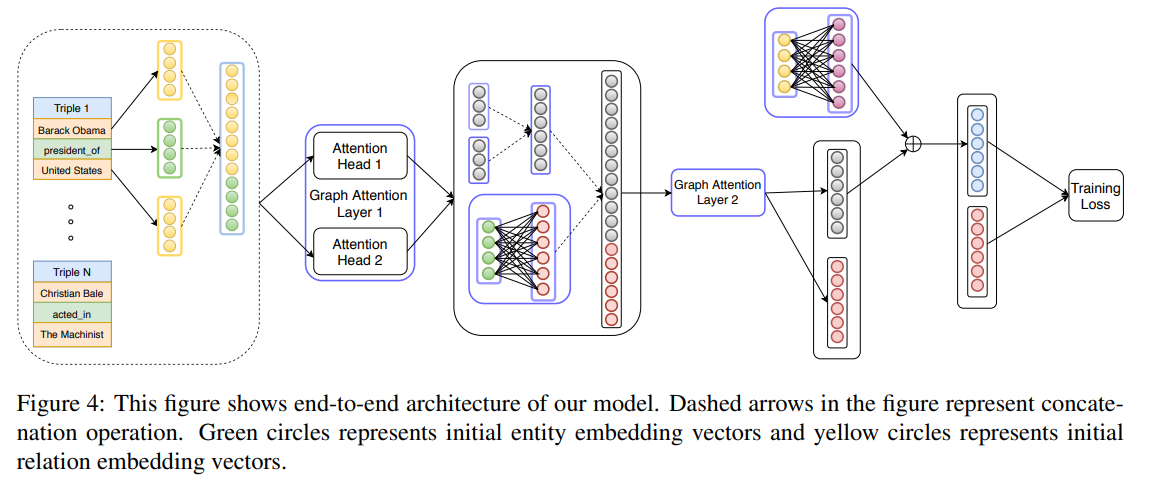

In [4]:
Image("../../images/kbat/kbat_f4.png")

This is the graph attention layer shown in Figure 4. We perform a linear transformation on input relation embedding matrix $G$, parameterized by a weight matrix $\boldsymbol{W}^{R} ∈ \mathbb{R}^{T × T'} $ , where $T'$ is the dimensionality of output relation embeddings (Equation 10).

$$
\begin{align*}
{G'}&={G.\boldsymbol{W}^R}&(10)
\end{align*}
$$

In the final layer of our model, instead of concatenating the embeddings from multiple heads we employ averaging to get final  embedding vectors for entities as shown in Equation 11. 


$$
\begin{align*}
{\overrightarrow{h'_{i}}}&={\sigma\left(\frac{1}{M} \sum_{m=1}^{M} \sum_{j \in \mathcal{N}_i} \sum_{k \in \mathcal{R}_{ij}} \alpha^m_{ijk} c^m_{ijk}\right)} & (11)
\end{align*}
$$



Lớp GAT được show trong Figure 4. Chúng tôi thực hiện biến đối tuyến tính trên ma trận mối quan hệ đầu vào $G$, tham số hóa bởi một trọng số ma trận $\boldsymbol{W}^{R} ∈ \mathbb{R}^{T × T'} $ , trong đó $T'$ là một số chiều của output relation embeddings  Equation 10).

$$
\begin{align*}
{G'}&={G.\boldsymbol{W}^R}&(10)
\end{align*}
$$

Trong lớp cuối cùng của mô hình chúng tôi, thay vì ghép các vector nhúng từ nhiều head, chúng tôi tính trung bình để lấy kết quả nhúng cuối cùng của thực thể được show trong Equation 11. 

$$
\begin{align*}
{\overrightarrow{h'_{i}}}&={\sigma\left(\frac{1}{M} \sum_{m=1}^{M} \sum_{j \in \mathcal{N}_i} \sum_{k \in \mathcal{R}_{ij}} \alpha^m_{ijk} c^m_{ijk}\right)} & (11)
\end{align*}
$$

However, while learning new embeddings, entities
lose their initial embedding information. To resolve this issue, we linearly transform $H^i$
to obtain $H^t$ using a weight matrix $W^E ∈ \mathbb{R}^{T^i×T^f}$ , whereHi represents the input entity embeddings to our model, $H^t$ represents the transformed entity embeddings, $T^i$ denotes the dimension of an initial entity embedding, and $T^f$ denotes the dimension of the final entity embedding. We add this initial entity embedding information to the entity embeddings obtained from the final attentional layer, $H^f ∈ R^{N_e×T^f}$ as shown in Equation 12
$$
\begin{align*}
{H''}&={W^E H^t + H^f} & (12)
\end{align*}
$$

In our architecture, we extend the notion of an
edge to a directed path by introducing an auxiliary relation for n-hop neighbors between two
entities. The embedding of this auxiliary relation is the summation of embeddings of all the
relations in the path. Our model iteratively accumulates knowledge from distant neighbors of
an entity. As illustrated in figure 2, in the first
layer of our model, all entities capture information from their direct in-flowing neighbors. In the
second layer, U.S gathers information from entities Barack Obama, Ethan Horvath, Chevrolet,
and Washington D.C, which already possess information about their neighbors Michelle Obama and
Samuel L. Jackson, from a previous layer. In general, for a n layer model the incoming information is accumulated over a n-hop neighborhood. The aggregation process to learn new entity embeddings and the introduction of an auxiliary edge
between n-hop neighbors is also shown in Figure 2. We normalize the entity embeddings after every
generalized GAT layer and prior to the first layer,
for every main iteration


### 3.4 Training Objective

Our model borrows the idea of a translational
scoring function from (Bordes et al., 2013), which
learns embeddings such that for a given valid triple $t^k_{ij} = (e_i, r_k, e_j)$, the condition $\vec{h_i}+\vec{g_k} ≈ \vec{h_j}$ holds, i.e., $e_j$ is the nearest neighbor of $e_i$ connected via relation $r_k$. Specifically, we try to learn entity and relation embeddings to minimize the L1-norm dissimilarity measure given by $d_{t_{ij}} = \big|\big|\vec{h_i}+ \vec{g_k}−\vec{h_j}\big|\big|_1$.

We train our model using hinge-loss which is
given by the following expression


$$
\begin{align*}
{L(\Omega)}&={\sum_{t_{ij} \in S} \sum_{t'_{ij} \in S'} \text{max}\{d_{t'_{ij}} - d_{t_{ij}} + \gamma , 0 \}} & (13)
\end{align*}
$$

where $γ > 0$ is a margin hyper-parameter, $S$ is the set of valid triples, and $S'$ denotes the set of invalid
triples, given formally as

$$
\begin{align*}
{S'}&={\underbrace{\{ t^k_{i'j} | e'_i \in \mathcal{E}\setminus e_i\}}_{\text{replace head entity}}\cup \underbrace{\{ t^k_{ij'} | e'_j \in \mathcal{E}\setminus e_j\}}_{\text{replace tail entity}}} & (13)
\end{align*}
$$

### 3.5 Decoder

Our model uses ConvKB (Nguyen et al., 2018) as
a decoder. The aim of the convolutional layer is
to analyze the global embedding properties of a
triple $t^k_{ij}$ across each dimension and to generalize
the transitional characteristics in our model. The
score function with multiple feature maps can be
written formally as:


$$
\begin{align*}
f(t^k_{ij})=\big(\big|\big|_{m=1}^{\Omega} \text{ReLU} ([\vec{h_i}, \vec{g_k}, \vec{h_j}] * \omega^m)\big).W
\end{align*}
$$

where $ω^m$ represents the mth convolutional filter,
$Ω$ is a hyper-parameter denoting number of filters
used, $∗$ is a convolution operator, and $W ∈ \mathbb{R}^{Ω k×1}$
represents a linear transformation matrix used to
compute the final score of the triple. The model is
trained using soft-margin loss as

$$
\begin{align*}
\mathcal{L} = \sum_{t^k_{ij} \in \{S \cup S'\}} \text{log}(1 + exp(l_{t^k_{ij}} . f(t^k_{ij}))) + \frac{\lambda}{2} \parallel{W}\parallel_2^2
\end{align*}
$$

where $l_{t^k_{ij}} = \begin{cases}
1 &\text{for } t^k_{ij} \in S \\
-1 &\text{for } t^k_{ij} \in S' \\
\end{cases}$

## 4 Experiments and Results

### 4.1 Datasets

To evaluate our proposed method, we use five
benchmark datasets: WN18RR (Dettmers et al.,
2018), FB15k-237 (Toutanova et al., 2015),
NELL-995 (Xiong et al., 2017), Unified Medical Language Systems (UMLS) (Kok and Domingos, 2007) and Alyawarra Kinship (Lin et al.,
2018). Previous works (Toutanova et al., 2015;
Dettmers et al., 2018) suggest that the task of
relation prediction in WN18 and FB15K suffers
from the problem of inverse relations, whereby
one can achieve state-of-the-art results using a
simple reversal rule based model, as shown by
(Dettmers et al., 2018). Therefore, corresponding subset datasets WN18RR and FB15k-237 were
created to resolve the reversible relation problem
in WN18 and FB15K. We used the data splits provided by (Nguyen et al., 2018). Table 1 provides
statistics of all datasets used.



### 4.2 Training Protocol
We create two sets of invalid triples, each time replacing either the head or tail entity in a triple by
an invalid entity. We randomly sample equal number of invalid triples from both the sets to ensure
robust performance on detecting both head and tail
entity. Entity and relation embeddings produced
by TransE (Bordes et al., 2013; Nguyen et al., 2018) are used to initialize our embeddings.

We follow a two-step training procedure, i.e.,
we first train our generalized GAT to encode information about the graph entities and relations
and then train a decoder model like ConvKB
(Nguyen et al., 2018) to perform the relation prediction task. The original GAT update Equation 3
only aggregates information passed from 1-hop
neighborhood, while our generalized GAT uses information from the n-hop neighborhood. We use
auxiliary relations to aggregate more information
about the neighborhood in sparse graphs. We use
Adam to optimize all the parameters with initial
learning rate set at 0.001. Both the entity and relation embeddings of the final layer are set to 200.
The optimal hyper-parameters set for each dataset
are mentioned in our supplementary section.


### 4.3 Evaluation Protocol
In the relation prediction task, the aim is to predict a triple $(e_i , r_k, e_j)$ with $e_i$ or $e_j$ missing,
i.e., predict ei given $(r_k, e_j )$ or predict ej given $(e_i, r_k)$. We generate a set of $(N − 1)$ corrupt triples for each entity ei by replacing it with every other entity $e'_i ∈ \mathcal{E} \setminus e_i$, then we assign a
score to each such triple. Subsequently, we sort
these scores in ascending order and get the rank
of a correct triple $(e_i, r_k, e_j)$. Similar to previous work ((Bordes et al., 2013), (Nguyen et al., 2018),
(Dettmers et al., 2018)), we evaluate all the models in a filtered setting, i.e, during ranking we remove corrupt triples which are already present in one of the training, validation, or test sets. This
whole process is repeated by replacing the tail entity $e_j$ , and averaged metrics are reported. We
report mean reciprocal rank (MRR), mean rank
(MR) and the proportion of correct entities in the
top N ranks (Hits@N) for N = 1, 3, and 10.

### 4.4 Results and Analysis

Tables 2 and 3 present the prediction results on
the test sets of all the datasets. The results
clearly demonstrate that our proposed method 

Menthod link :

* TransE (https://github.com/datquocnguyen/STransE)
* DistMult(https://github.com/TimDettmers/ConvE)
* ComplEx (https://github.com/ttrouill/complex)
* R-GCN(https://github.com/MichSchli/RelationPrediction)
* ConvE(https://github.com/TimDettmers/ConvE)
* ConvKB(https://github.com/daiquocnguyen/ConvKB)

## Tóm tắt

Mô hình gồm 2 phần :
Layer 1 :
```python
model_gat = SpKBGATModified(entity_embeddings, relation_embeddings, args.entity_out_dim, args.entity_out_dim,
                                args.drop_GAT, args.alpha, args.nheads_GAT)
```
Layer 2 :                         
```python
model_conv = SpKBGATConvOnly(entity_embeddings, relation_embeddings, args.entity_out_dim, args.entity_out_dim,
                                 args.drop_GAT, args.drop_conv, args.alpha, args.alpha_conv,
                                 args.nheads_GAT, args.out_channels)
```

In [1]:
import torch
